## Predicting Sales and Revenue New Data

In [11]:
#importing packages
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [12]:
df = pd.read_excel("Data\df_pred.xlsx",engine='openpyxl')

In [13]:
df.drop(['Unnamed: 0'],inplace = True,axis =1)

In [14]:
df.head(3)

,Client,ProbablitySaleMF,RevenueMF,ProbablitySaleCL,RevenueCL,ProbablitySaleCC,RevenueCC
0,909,0.357088,0.0,0.444282,0.000000,0.313191,0.0
1,699,0.462286,0.0,0.564768,15.055770,0.427167,0.0
2,528,0.381130,0.0,0.535420,9.076186,0.400692,0.0


In [15]:
df['ExpectedRevenueMF'] = df.ProbablitySaleMF * df.RevenueMF
df['ExpectedRevenueCL'] = df.ProbablitySaleCL * df.RevenueCL
df['ExpectedRevenueCC'] = df.ProbablitySaleCC * df.RevenueCC

In [16]:
df.head(3)

,Client,ProbablitySaleMF,RevenueMF,ProbablitySaleCL,RevenueCL,ProbablitySaleCC,RevenueCC,ExpectedRevenueMF,ExpectedRevenueCL,ExpectedRevenueCC
0,909,0.357088,0.0,0.444282,0.000000,0.313191,0.0,0.0,0.000000,0.0
1,699,0.462286,0.0,0.564768,15.055770,0.427167,0.0,0.0,8.503017,0.0
2,528,0.381130,0.0,0.535420,9.076186,0.400692,0.0,0.0,4.859572,0.0


In [17]:
df['ExpectedRevenue'] = df[["ExpectedRevenueMF", "ExpectedRevenueCL","ExpectedRevenueCC"]].max(axis=1)


In [18]:
df = df.query("ExpectedRevenue != 0.0")

In [19]:
df['recommendedOffer'] = df[["ExpectedRevenueMF", "ExpectedRevenueCL","ExpectedRevenueCC"]].idxmax(axis=1).str[-2:]

In [20]:
df.sort_values(by=['ExpectedRevenue'], inplace=True, ascending=False)

In [21]:
df.head(3)

,Client,ProbablitySaleMF,RevenueMF,ProbablitySaleCL,RevenueCL,ProbablitySaleCC,RevenueCC,ExpectedRevenueMF,ExpectedRevenueCL,ExpectedRevenueCC,ExpectedRevenue,recommendedOffer
253,1365,0.500694,5.558522,0.689357,11.997049,0.512100,41.782279,2.783121,8.270249,21.396718,21.396718,CC
294,197,0.398299,3.589079,0.319981,0.000000,0.802965,23.321052,1.429526,0.000000,18.725982,18.725982,CC
103,1414,0.215309,0.000000,0.116086,0.000000,0.972163,19.227021,0.000000,0.000000,18.691801,18.691801,CC


In [22]:
df_final_recomend = df.iloc[0:100,:]

In [23]:
print("The Expected Revenue from Consumer Loan, Credit Card and Mutual Fund is: ",df_final_recomend.ExpectedRevenue.sum())

The Expected Revenue from Consumer Loan, Credit Card and Mutual Fund is:  1021.9402927453694


In [24]:
df_final_recomend.to_excel('Data\df_final_recomend.xlsx')

In [25]:
Counter(df_final_recomend.recommendedOffer)

Counter({'CC': 13, 'MF': 36, 'CL': 51})

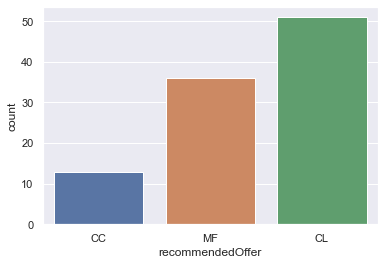

In [26]:
sns.set(rc={'figure.figsize':(6,4)})
sns.countplot(df_final_recomend.recommendedOffer);

In [27]:
Counter(df.recommendedOffer)

Counter({'CC': 49, 'MF': 157, 'CL': 150})

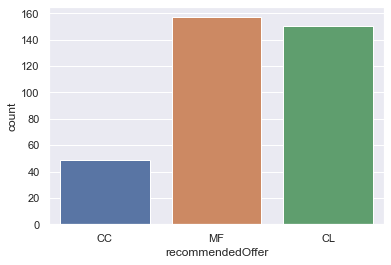

In [28]:
sns.set(rc={'figure.figsize':(6,4)})
sns.countplot(df.recommendedOffer);